<a href="https://colab.research.google.com/github/shashank-dj/ML_project/blob/main/TITANIC_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic disater -> Predict whether the number of people survived 

*Let*'s import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! unzip Titanic_data.zip

Archive:  Titanic_data.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import zipfile


zip_ref = zipfile.ZipFile("Titanic_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls Titanic_data

ls: cannot access 'Titanic_data': No such file or directory


In [ ]:
#Loading the trianing set
titan_train = pd.read_csv("/content/train.csv")
titan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Load the test set
titan_test = pd.read_csv("/content/test.csv")
titan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Shape of the training set
titan_train.shape

(891, 12)

In [ ]:
titan_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

from the above observation we can see that there are 177 null values in the Age instance and 687 null values in the cabin instance

In [ ]:
titan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titan_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's check the correlation between the columns

In [ ]:
titan_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
titanic = pd.concat([titan_train,titan_test],axis=0)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic.shape

(1309, 12)

In [ ]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
titanic.set_index('PassengerId',inplace=True)

In [ ]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


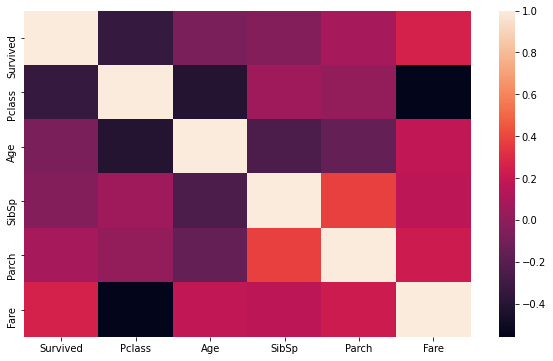

In [ ]:
#visualizing the correlation
torr = titanic.corr()
plt.figure(figsize=(10,6))
sns.heatmap(torr)

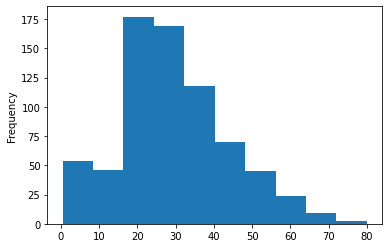

In [ ]:
titan_train.Age.plot.hist()

In [ ]:
titan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#view the example submission dataframe
gender_submission = pd.read_csv('/content/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
titan_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# check for the missing values


using missingno module,Lets check for the missing data

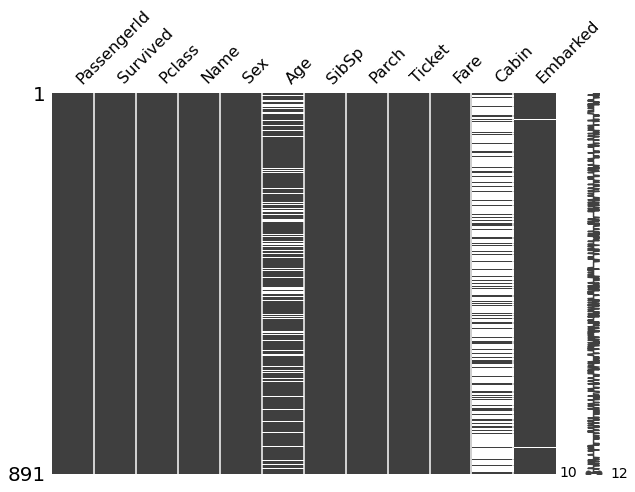

In [ ]:
import missingno

missingno.matrix(titan_train, figsize=(10,7))

# Create new dataframes for discreatised continusous variable and continuous variables



In [ ]:
#dicritised continuous variable
df_bin = pd.DataFrame()
#continuous variables
df_con = pd.DataFrame()

# Exploring individual fetures 

In [ ]:
titan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.Survied class

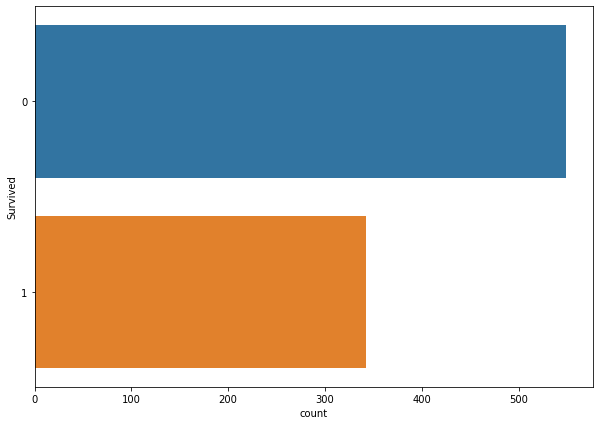

In [ ]:
# how many people survived?
fig = plt.figure(figsize=(10,7))
sns.countplot(y="Survived", data=titan_train)

In [ ]:
# let's add this to our subset dataframes
df_bin["Survived"] = titan_train["Survived"]
df_con["Survived"] = titan_train["Survived"]

In [ ]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# 2. Pclass

The ticket class of passenger

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


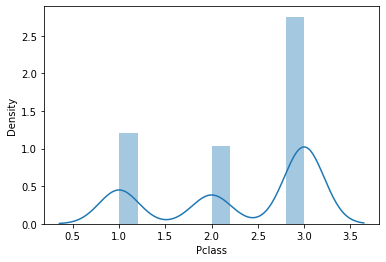

In [ ]:
sns.distplot(titan_train.Pclass)

In [ ]:
# check for missing values in Pclass
titan_train.Pclass.isnull().sum()

0

In [ ]:
#add it to new dataframe
df_bin["Pclass"] = titan_train["Pclass"]
df_con["Pclass"] = titan_train["Pclass"]

In [ ]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [ ]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


# 3.Name

In [ ]:
titan_train.Name.value_counts()

Sadlier, Mr. Matthew                 1
Lennon, Mr. Denis                    1
Danbom, Mr. Ernst Gilbert            1
Beane, Mrs. Edward (Ethel Clarke)    1
Markoff, Mr. Marin                   1
                                    ..
Lindqvist, Mr. Eino William          1
Renouf, Mr. Peter Henry              1
Panula, Master. Urho Abraham         1
Dahl, Mr. Karl Edwart                1
Stankovic, Mr. Ivan                  1
Name: Name, Length: 891, dtype: int64

Name is an unique class , so we can't consider it for analysis

#  4.Sex

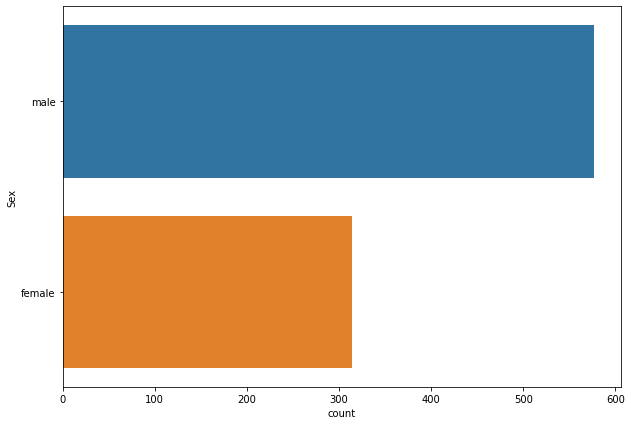

In [ ]:
#distribution of sex
plt.figure(figsize=(10,7))
sns.countplot(y="Sex", data=titan_train)

In [ ]:
#check for null values
titan_train.Sex.isnull().sum()

0

In [ ]:
# add to new dataframes
df_bin["Sex"] = titan_train["Sex"]
df_bin["Sex"] = np.where(df_bin["Sex"]=="female",1,0)
df_con["Sex"] = titan_train["Sex"]


In [ ]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [ ]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


# comparing sex varible with survival

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


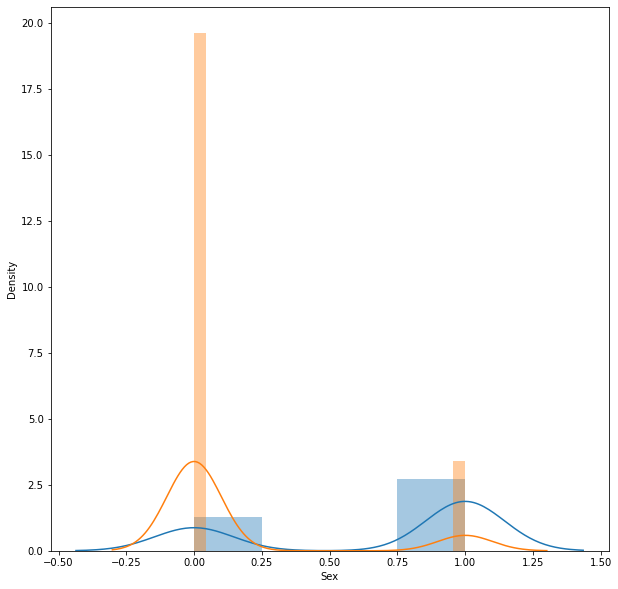

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin["Survived"]==1]["Sex"], kde_kws={"label":"Survived"})
sns.distplot(df_bin.loc[df_bin["Survived"]==0]["Sex"], kde_kws={"label":"Not Survived"})

majority female survived

# 5.Age

In [ ]:
titan_train.Age.isnull().sum()

177

So there are 177 missing values in our age data. 
How to fill the missing values in Age columns?
Let's create function to count and distribution visualization

In [ ]:
def plot_counts_dist(data, bin_df, label_column, target_column, figsize=(10,7), use_bin_df=False):
  if use_bin_df:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot(y=target_column, data=bin_df)
    plt.subplot(1,2,2)
    sns.distplot(data.loc[data[label_column]==1][target_column], kde_kws={"label":"Survived"})
    sns.distplot(data.loc[data[label_column]==0][target_column], kde_kws={"label":"Not Survived"})
  else:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot(y=target_column,data=data)
    plt.subplot(1,2,2)
    sns.distplot(data.loc[data[label_column]==1][target_column], kde_kws={"label":"survived"})
    sns.distplot(data.loc[data[label_column]==0][target_column], kde_kws={"label":"Not survived"})


# 6.sibsp

the number of siblings/spouses the passenger has aboard the titanic

In [ ]:
#check for the missing values
titan_train.SibSp.isnull().sum()

0

In [ ]:
titan_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df_bin["SibSp"] = titan_train["SibSp"]
df_con["SbSip"] = titan_train["SibSp"]

# 7.Parch

the number of parents/childrens the passenger has aboard the titanic

In [ ]:
titan_train.Parch.isnull().sum()

0

In [ ]:
df_bin["Parch"]=titan_train["Parch"]
df_con["Parch"]=titan_train["Parch"]

In [ ]:
titan_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


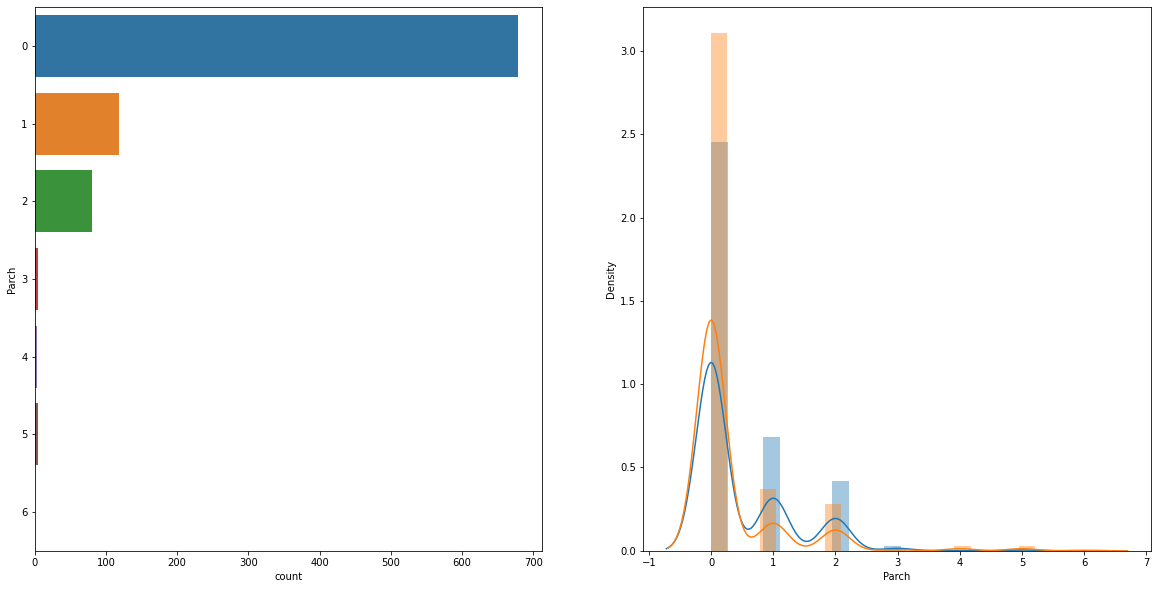

In [ ]:
plot_counts_dist(titan_train, 
                 bin_df=df_bin,
                 label_column="Survived",
                 target_column="Parch",
                 figsize=(20,10))

In [ ]:
df_con.head()

,Survived,Pclass,Sex,SbSip,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


# 8.Ticket

In [ ]:
titan_train.Ticket.isnull().sum()

0

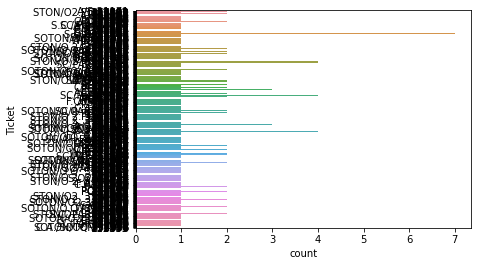

In [ ]:
sns.countplot(y="Ticket", data=titan_train)

In [ ]:
titan_train.Ticket.value_counts()

CA. 2343     7
1601         7
347082       7
3101295      6
CA 2144      6
            ..
367228       1
234360       1
A4. 54510    1
PC 17595     1
31028        1
Name: Ticket, Length: 681, dtype: int64

# 9.Fare

In [ ]:
titan_train.Fare.isnull().sum()

0

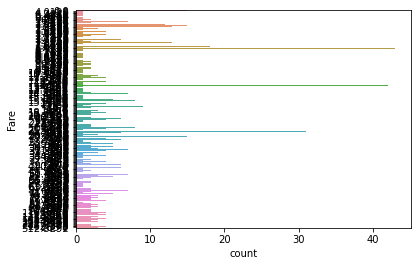

In [ ]:
sns.countplot(y="Fare", data=titan_train)

In [ ]:
# Unique kind the of fare
df_con["Fare"]= titan_train["Fare"]
df_bin["Fare"] = pd.cut(titan_train["Fare"], bins=5)

In [ ]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


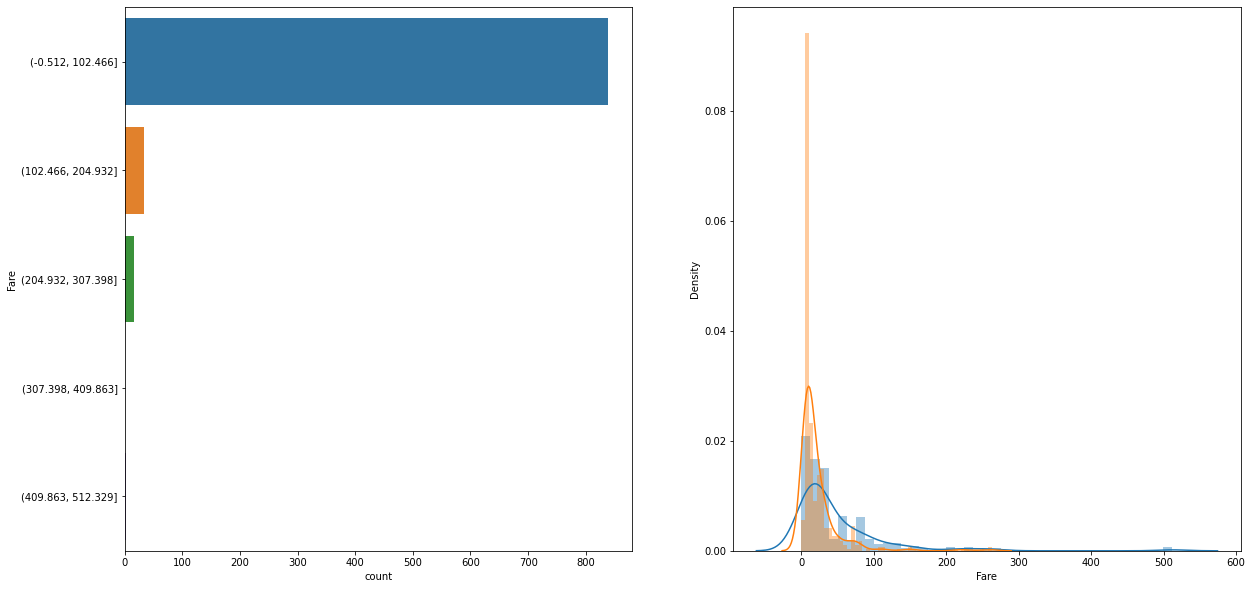

In [ ]:
plot_counts_dist(data=titan_train,
                 bin_df=df_bin,
                 label_column='Survived',
                 target_column="Fare",
                 figsize=(20,10),
                 use_bin_df=True)

# 10. cabin

In [ ]:
titan_train.Cabin.isnull().sum()

687

In [ ]:
titan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 11. Embarked


the port where the passenger boarded the Titanic

In [ ]:
titan_train.Embarked.isnull().sum()

2

In [ ]:
titan_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

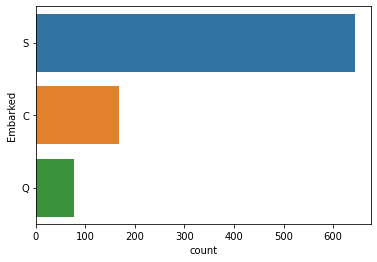

In [ ]:
sns.countplot(y="Embarked", data=titan_train)

Let's remove those two rows where the vlues are missing

In [ ]:
df_bin["Embarked"]=titan_train["Embarked"]
df_con["Embarked"]=titan_train["Embarked"]
len(df_con)

891

In [ ]:
df_con = df_con.dropna(subset=["Embarked"])
df_bin = df_bin.dropna( subset=["Embarked"])

# feature encoding

In [ ]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


one hot encoding the binned values


In [ ]:
one_hot_cols = df_bin.columns.to_list()
one_hot_cols.remove("Survived")
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_con.head()

,Survived,Pclass,Sex,SbSip,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


one hot encode the categorical columns

In [ ]:
df_embarked_one_hot = pd.get_dummies(df_con["Embarked"], prefix="embarked")
df_sex_one_hot = pd.get_dummies(df_con["Sex"], prefix="sex")
df_pclass_one_hot = pd.get_dummies(df_con["Pclass"], prefix='pclass')

In [ ]:
df_con_enc = pd.concat([df_con,
                       df_embarked_one_hot,
                       df_sex_one_hot,
                       df_pclass_one_hot], axis=1)

In [ ]:
df_con_enc = df_con_enc.drop(["Pclass", "Sex", "Embarked"], axis=1)

In [ ]:
df_con_enc.head()

,Survived,SbSip,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


# Building a model

In [ ]:
select_df = df_con_enc

In [ ]:
X_train = select_df.drop('Survived', axis=1)
y_train = select_df.Survived

In [ ]:
X_train.shape, y_train.shape

((889, 11), (889,))

Function to run the requested algorithm and returns the accuracy metrics

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model


In [ ]:
def fit_ml_algo(algo, X_train, y_train,cv):
  model = algo.fit(X_train, y_train)
  acc = round(model.score(X_train, y_train)*100, 2)
  train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
  acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)

  return train_pred, acc, acc_cv


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import time, datetime
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train,10)
log_time = (time.time()-start_time)
print("Accuracy", acc_log)
print("Accuracy Cv 10-Fold: ", acc_cv_log)
print("Running Time: " , datetime.timedelta(seconds=log_time))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy 79.98
Accuracy Cv 10-Fold:  79.42
Running Time:  0:00:01.097871


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
trian_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), X_train, y_train, 10)
gaussian_time = (time.time()- start_time)
print("Accuracy: ", acc_gaussian)
print("accuracy cv 10-fold: ", acc_cv_gaussian)
print("Running time: ", datetime.timedelta(seconds=gaussian_time))


Accuracy:  78.52
accuracy cv 10-fold:  77.95
Running time:  0:00:00.054712


# Linear support vector machines

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, y_train, 10)
linear_svc_time = (time.time()- start_time)
print("Accuracy: ", acc_linear_svc)
print("Accuracy CV 10-Fold: ", acc_cv_linear_svc)
print("Running Time: ", datetime.timedelta(seconds=linear_svc_time))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  78.63
Accuracy CV 10-Fold:  76.72
Running Time:  0:00:00.319645


# K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(),X_train, y_train,10)

knn_time = (time.time()-start_time)
print("Accuracy : ", acc_knn)
print("Accuracy CVC 10-Fold: ", acc_cv_knn)
print("accuracy Time", datetime.timedelta(seconds=knn_time))

Accuracy :  83.46
Accuracy CVC 10-Fold:  76.72
accuracy Time 0:00:00.117203


# SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train,y_train, 10)
sgd_time=(time.time()-start_time)
print(acc_sgd)
print(acc_cv_sgd)
print(datetime.timedelta(seconds=sgd_time))

61.19
68.62
0:00:00.098199


# Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train,y_train, 10)
dt_time = (time.time()-start_time)
print(acc_dt)
print(acc_cv_dt)


92.46
80.09


In [ ]:
clf = DecisionTreeClassifier(max_depth=2,
                             random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
X_test = select_df.drop('Survived', axis=1)
y_test = select_df.Survived

In [ ]:
predictions = clf.predict(X_test)

# Best Model

Accuracy scores

In [ ]:
modles = pd.DataFrame({"Modles":["KNN","Logistic Regression","Naive Bayes","SGD", "Linear SVC","Decision Tree"],
                       "score":[acc_knn,
                                acc_log,acc_gaussian,acc_sgd,
                                acc_linear_svc,acc_dt]
})
modles.sort_values(by="score",ascending=False)

,Modles,score
5,Decision Tree,92.46
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,78.63
2,Naive Bayes,78.52
3,SGD,61.19


Cross validation scores

In [ ]:
cv_modles = pd.DataFrame({"Modles":["KNN","Logistic Regression","Naive Bayes","SGD", "Linear SVC","Decision Tree"],
                       "score":[acc_cv_knn,
                                acc_cv_log,acc_cv_gaussian,acc_cv_sgd,
                                acc_cv_linear_svc,acc_cv_dt]
})
modles.sort_values(by="score",ascending=False)

,Modles,score
5,Decision Tree,92.46
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,78.63
2,Naive Bayes,78.52
3,SGD,61.19


In [ ]:
X_train.head()

,SbSip,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
titan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
women = titan_train.loc[titan_train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = titan_train.loc[titan_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
titan_train = pd.read_csv("/content/train.csv")
titan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titan_test = pd.read_csv("/content/test.csv")
titan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
y = titan_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titan_train[features])
X_test = pd.get_dummies(titan_test[features])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
y_train_pred = model.predict(X)

In [ ]:

from sklearn.metrics import f1_score
f1_score(y, y_train_pred)

0.7413249211356466

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_train_pred)

0.8159371492704826

In [ ]:
titan_train = titan_train[['Fare','Sex', 'SibSp', 'Pclass','Survived']]
titan_train = pd.get_dummies(titan_train, columns=['Sex', 'SibSp', 'Pclass'])

Y = titan_train['Survived']
X = titan_train.drop(['Survived'], axis='columns')

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y)

import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_train, y_train)
xgb.score(x_test, y_test)

0.8071748878923767

In [ ]:
titan_test = titan_test[['Fare','Sex', 'SibSp', 'Pclass']]
titan_test = pd.get_dummies(titan_test, columns=['Sex', 'SibSp', 'Pclass'])
X_TEST = scaler.transform(titan_test)
predictions = xgb.predict(X_TEST)
predictions.shape

(418,)

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Are our test and submission dataframes the same length?
if len(submission) == len(titan_test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [ ]:
submission.to_csv('../code_submission.csv', index=False)
#print('Submission CSV is ready!')

In [ ]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../code_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
